In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from hardwares.hardware_params import hardware_params


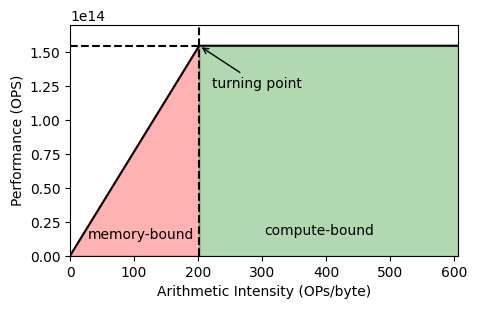

In [2]:
# bandwidth, FP16 MAC
def draw_roofline(bandwidth, max_OPS):
    # bandwidth is bytes/s
    # x axis is mac/byte
    # y axis is mac/s
    fig=plt.figure(figsize=(5, 3))
    y_max = max_OPS
    turning_point = y_max / bandwidth

    plt.plot(
        [0, turning_point, turning_point * 3], [0, y_max, y_max], color="black"
    )
    plt.xlabel("Arithmetic Intensity (OPs/byte)")
    plt.ylabel("Performance (OPS)")

    # left zone, red, right zone green (fill with rectangle), turning_point h_line vline
    plt.fill_between(
        [0, turning_point], [0, y_max], color="red", alpha=0.3, label="Memory Bound"
    )
    # text memory bound without arrow
    plt.text(turning_point * 0.55, y_max * 0.1, "memory-bound", ha="center", va="center")
    
    plt.fill_between(
        [turning_point,turning_point, turning_point * 3],
        [0,y_max, y_max],
        color="green",
        alpha=0.3,
        label="compute-bound",
    )
    # text compute bound without arrow
    plt.text(turning_point * 1.5, y_max * 0.1, "compute-bound")

    plt.hlines(y_max, 0, turning_point, color="black", linestyle="--")
    plt.vlines(turning_point, 0, y_max*2, color="black", linestyle="--")
    # annotate turning point
    plt.annotate(
        "turning point",
        xy=(turning_point, y_max),
        xytext=(turning_point * 1.1, y_max * 0.8),
        arrowprops=dict(arrowstyle="->"),
    )
    plt.ylim(0, y_max * 1.1)
    plt.xlim(0, turning_point * 3)
    

hardware="nvidia_A6000"
bandwidth = hardware_params[hardware]["bandwith"]
max_OPS = hardware_params[hardware]["FP16"]
draw_roofline(bandwidth, max_OPS)
# save pdf
plt.savefig(f"../output/roofline_{hardware}.pdf", bbox_inches="tight")

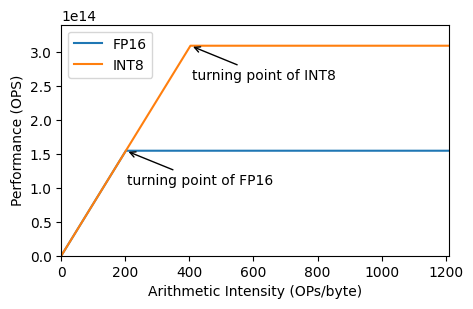

In [3]:

def draw_roofline(bandwidth, max_OPS,dtype):
    # bandwidth is bytes/s
    # x axis is mac/byte
    # y axis is mac/s
    
    y_max = max_OPS
    turning_point = y_max / bandwidth

    plt.plot(
        [0, turning_point, turning_point * 10], [0, y_max, y_max], label=dtype
    )
    
    plt.xlabel("Arithmetic Intensity (OPs/byte)")
    plt.ylabel("Performance (OPS)")
    plt.annotate(
        f"turning point of {dtype}",
        xy=(turning_point, y_max),
        xytext=(turning_point * 1.01, y_max -5e13),
        arrowprops=dict(arrowstyle="->"),
    )
    plt.ylim(0, y_max * 1.1)
    plt.xlim(0, turning_point * 3)
    

hardware="nvidia_A6000"
fig=plt.figure(figsize=(5, 3))
bandwidth = hardware_params[hardware]["bandwith"]
max_OPS = hardware_params[hardware]["FP16"]
draw_roofline(bandwidth, max_OPS,"FP16")
draw_roofline(bandwidth, max_OPS*2,"INT8")
plt.legend()
# save pdf
plt.savefig(f"../output/quantization_roofline_{hardware}.pdf", bbox_inches="tight")